# 🎬 Netflix Dataset - Exploratory Data Analysis (Assignment 3)
### **By: Zaid**

**Objective:** Perform a complete Exploratory Data Analysis (EDA) on the Netflix dataset including data cleaning, measures of central tendency, variability, and bivariate analysis.

This includes outlier detection (IQR method), trimmed mean, top frequency counts, and detailed visualizations.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Configure styles
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

## 📥 Step 1: Load and Inspect the Dataset

In [6]:
file_path=r"C:\Users\Mohammad Rihan\OneDrive\Desktop\python&EDA\raw_titles.csv"
netflix = pd.read_csv(file_path)

print('First 5 Rows:')
display(netflix.head())

print('Last 5 Rows:')
display(netflix.tail())

print('Dataset Shape:', netflix.shape)
print('\nDataset Info:')
netflix.info()

print('\nStatistical Summary:')
display(netflix.describe(include='all'))

First 5 Rows:


,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0


Last 5 Rows:


,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
5801,5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0
5805,5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0


Dataset Shape: (5806, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5806 non-null   int64  
 1   id                    5806 non-null   object 
 2   title                 5805 non-null   object 
 3   type                  5806 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 589.8+ KB

Statistical Summary:


,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
count,5806.000000,5806,5805,5806,5806.000000,3196,5806.000000,5806,5806,2047.000000,5362,5283.000000,5.267000e+03
unique,NaN,5806,5751,2,NaN,11,NaN,1626,449,NaN,5362,NaN,NaN
top,NaN,ts300399,The Gift,MOVIE,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt0075314,NaN,NaN
freq,NaN,1,3,3759,NaN,841,NaN,510,1950,NaN,1,NaN,NaN
mean,2902.500000,NaN,NaN,NaN,2016.013434,NaN,77.643989,NaN,NaN,2.165608,NaN,6.533447,2.340719e+04
std,1676.192163,NaN,NaN,NaN,7.324883,NaN,39.474160,NaN,NaN,2.636207,NaN,1.160932,8.713432e+04
min,0.000000,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00
25%,1451.250000,NaN,NaN,NaN,2015.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.210000e+02
50%,2902.500000,NaN,NaN,NaN,2018.000000,NaN,84.000000,NaN,NaN,1.000000,NaN,6.600000,2.279000e+03
75%,4353.750000,NaN,NaN,NaN,2020.000000,NaN,105.000000,NaN,NaN,2.000000,NaN,7.400000,1.014400e+04


## 🧹 Step 2: Data Cleaning
We’ll handle missing values, duplicates, and detect outliers using the IQR method.

Missing Values per Column:
index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

After cleaning, dataset shape: (5806, 13)
Outliers detected in release_year: 498


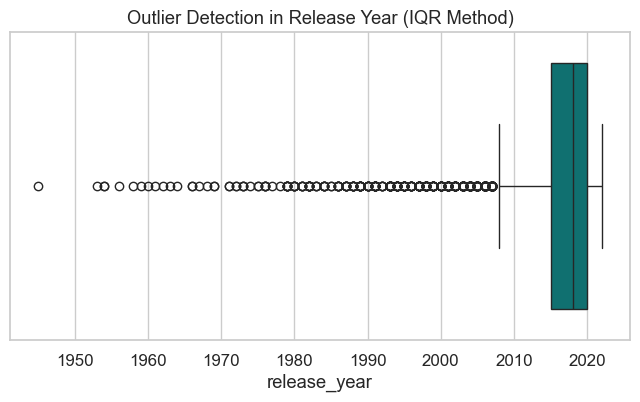

In [9]:
# Check for missing values
print('Missing Values per Column:')
print(netflix.isnull().sum())

# Fill missing categorical values with 'Unknown'
netflix.fillna({'type': 'Unknown', 'title': 'Unknown', 'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown', 'rating': 'Unknown'}, inplace=True)

# Drop duplicates
netflix.drop_duplicates(inplace=True)
print('\nAfter cleaning, dataset shape:', netflix.shape)

# Detect outliers in release_year using IQR
Q1 = netflix['release_year'].quantile(0.25)
Q3 = netflix['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = netflix[(netflix['release_year'] < lower_bound) | (netflix['release_year'] > upper_bound)]
print(f'Outliers detected in release_year: {len(outliers)}')

# Visualize outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=netflix['release_year'], color='teal')
plt.title('Outlier Detection in Release Year (IQR Method)')
plt.show()

## 📊 Step 3: Univariate Analysis (Numerical Variables)
We calculate mean, median, trimmed mean, range, variance, and standard deviation for numeric columns.

,Mean,Median,Trimmed Mean (10%),Variance,Standard Deviation,Range
0,2016.013434,2018.0,2017.539604,53.653911,7.324883,77


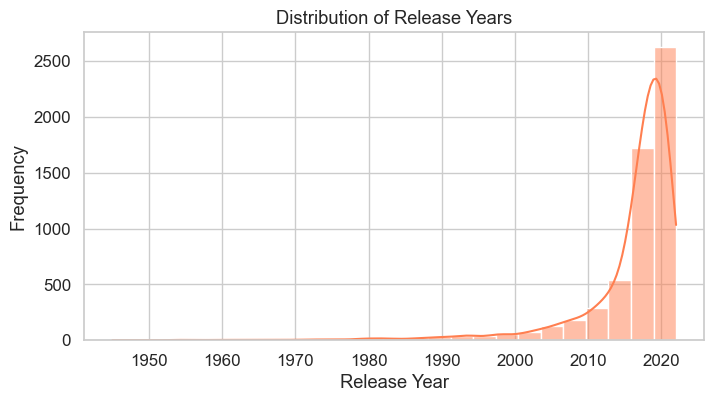

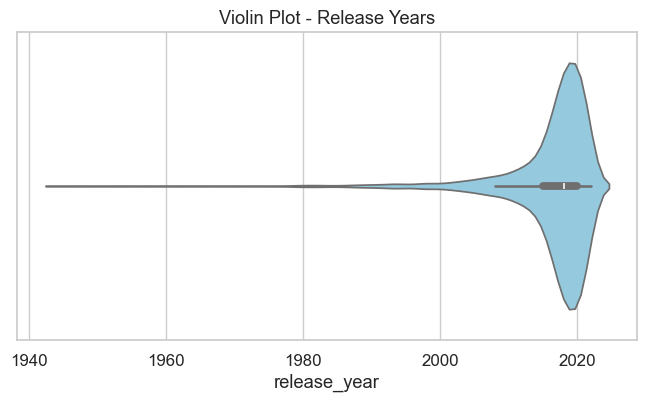

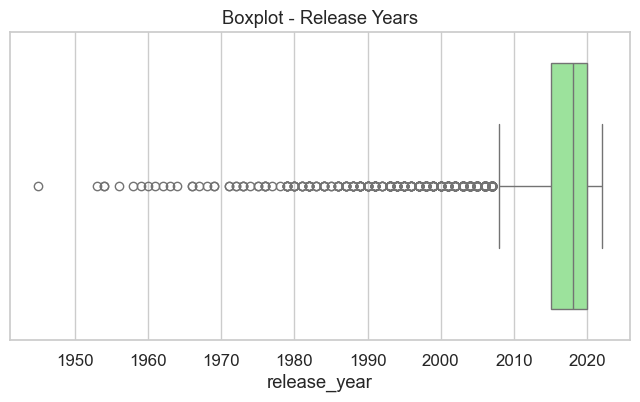

In [11]:
mean_year = netflix['release_year'].mean()
median_year = netflix['release_year'].median()
trimmed_mean = stats.trim_mean(netflix['release_year'], 0.1)
variance_year = netflix['release_year'].var()
std_year = netflix['release_year'].std()
range_year = netflix['release_year'].max() - netflix['release_year'].min()

summary = pd.DataFrame({
    'Mean': [mean_year],
    'Median': [median_year],
    'Trimmed Mean (10%)': [trimmed_mean],
    'Variance': [variance_year],
    'Standard Deviation': [std_year],
    'Range': [range_year]
})
display(summary)

plt.figure(figsize=(8,4))
sns.histplot(netflix['release_year'], kde=True, color='coral', bins=25)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,4))
sns.violinplot(x=netflix['release_year'], color='skyblue')
plt.title('Violin Plot - Release Years')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=netflix['release_year'], color='lightgreen')
plt.title('Boxplot - Release Years')
plt.show()

## 📚 Step 4: Univariate Analysis (Categorical Variables)
We’ll examine the most frequent categories and their proportions.

Categorical Variables Analysis:

Top 10 Frequent Categories in type:


,Count,Percentage
type,,
MOVIE,3759,64.74
SHOW,2047,35.26


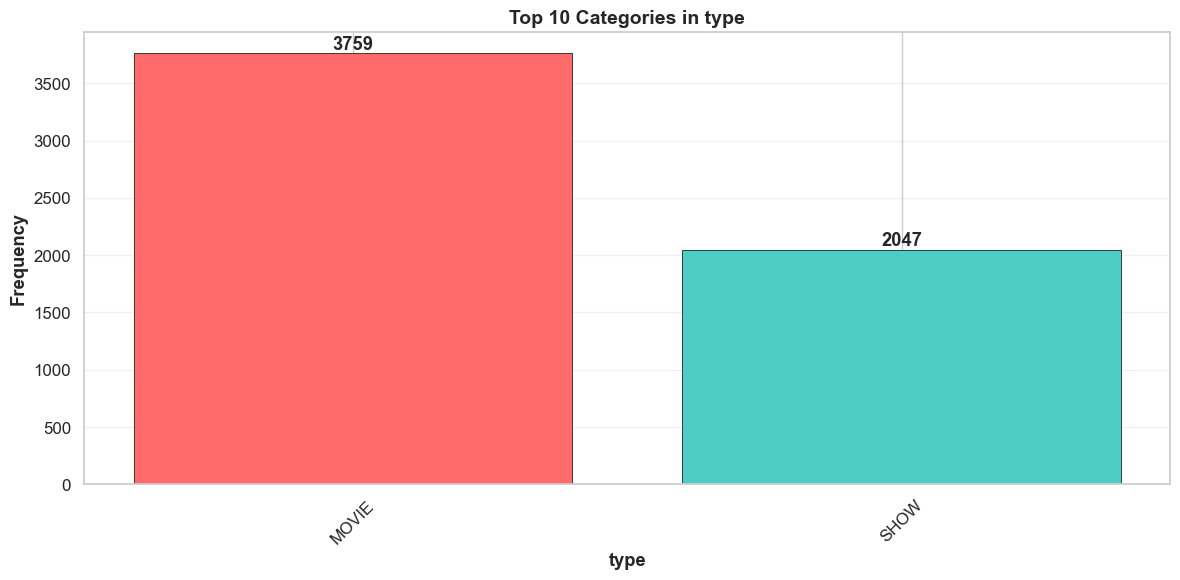


Top 10 Frequent Categories in age_certification:


,Count,Percentage
age_certification,,
TV-MA,841,14.49
R,575,9.90
TV-14,470,8.10
PG-13,440,7.58
PG,246,4.24
TV-PG,186,3.20
G,131,2.26
TV-Y7,112,1.93
TV-Y,105,1.81


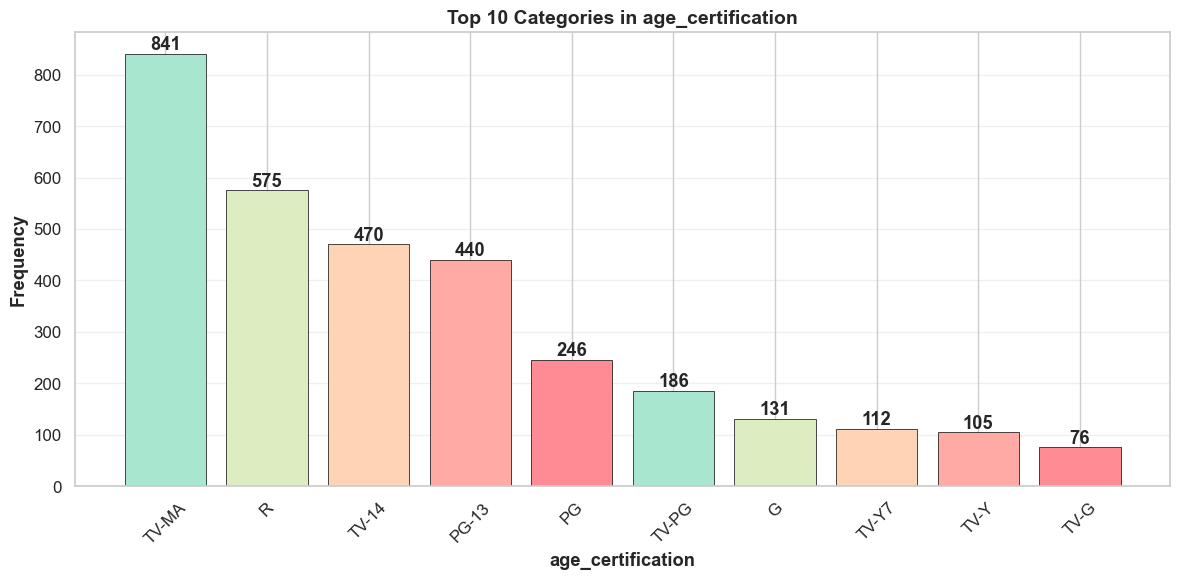


Top 10 Frequent Categories in genres:


,Count,Percentage
genres,,
['comedy'],510,8.78
['drama'],350,6.03
['documentation'],320,5.51
"['comedy', 'drama']",141,2.43
"['drama', 'comedy']",128,2.20
['reality'],120,2.07
"['drama', 'romance']",112,1.93
"['comedy', 'documentation']",93,1.60
['animation'],69,1.19


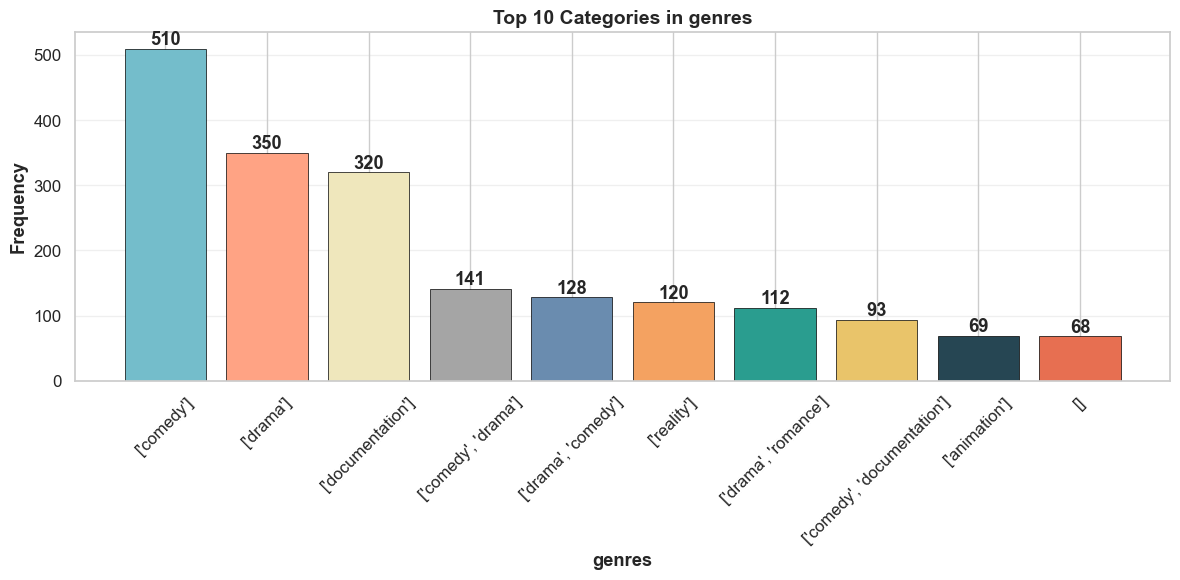


Top 10 Frequent Categories in production_countries:


,Count,Percentage
production_countries,,
['US'],1950,33.59
['IN'],605,10.42
['JP'],266,4.58
[],232,4.00
['GB'],219,3.77
['KR'],210,3.62
['ES'],159,2.74
['FR'],124,2.14
['CA'],103,1.77


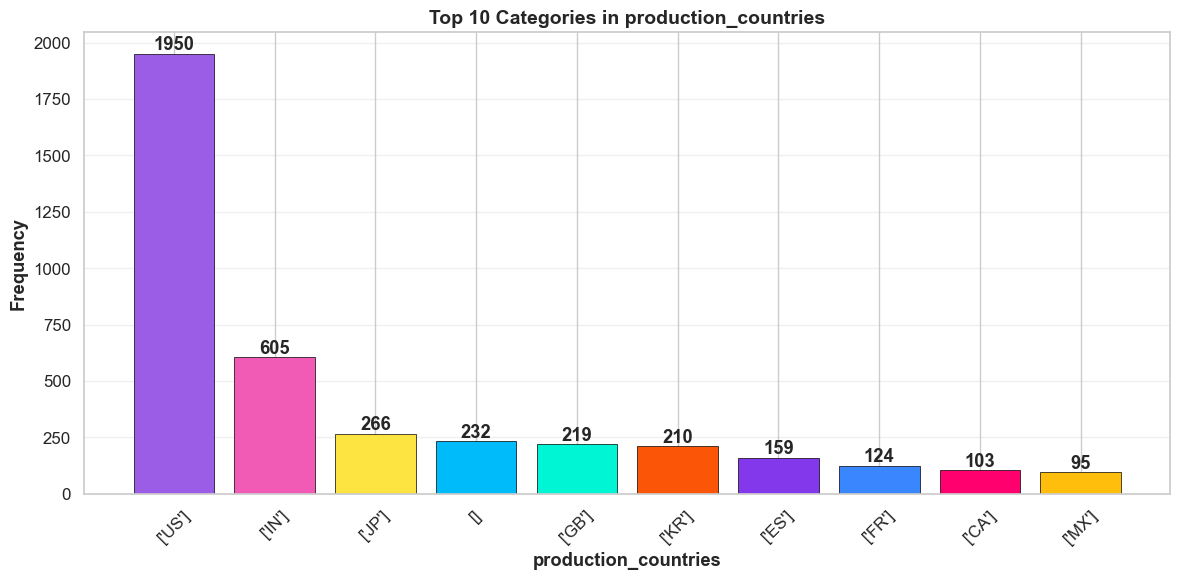

In [22]:
# Step 4: Univariate Analysis (Categorical Variables)
categorical_cols = ['type', 'age_certification', 'genres', 'production_countries']

# Define different color palettes for each graph
color_palettes = {
    'type': ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'],
    'age_certification': ['#A8E6CF', '#DCEDC1', '#FFD3B6', '#FFAAA5', '#FF8B94'],
    'genres': ['#74BDCB', '#FFA384', '#EFE7BC', '#A5A5A5', '#6A8CAF', '#F4A261', '#2A9D8F', '#E9C46A', '#264653', '#E76F51'],
    'production_countries': ['#9B5DE5', '#F15BB5', '#FEE440', '#00BBF9', '#00F5D4', '#FB5607', '#8338EC', '#3A86FF', '#FF006E', '#FFBE0B']
}

print('Categorical Variables Analysis:')
for i, col in enumerate(categorical_cols):
    print(f'\nTop 10 Frequent Categories in {col}:')
    top10 = netflix[col].value_counts().head(10)
    percent = round((top10 / len(netflix)) * 100, 2)
    freq_df = pd.DataFrame({'Count': top10, 'Percentage': percent})
    display(freq_df)
    
    # Visualization for top categories
    plt.figure(figsize=(12, 6))
    
    if col in ['genres', 'production_countries']:
        # For list-type columns
        if col == 'genres':
            all_genres = netflix[col].explode().value_counts().head(10)
            colors = color_palettes['genres'][:len(all_genres)]
            bars = plt.bar(range(len(all_genres)), all_genres.values, color=colors, edgecolor='black', linewidth=0.5)
            plt.xticks(range(len(all_genres)), all_genres.index, rotation=45)
            
        elif col == 'production_countries':
            all_countries = netflix[col].explode().value_counts().head(10)
            colors = color_palettes['production_countries'][:len(all_countries)]
            bars = plt.bar(range(len(all_countries)), all_countries.values, color=colors, edgecolor='black', linewidth=0.5)
            plt.xticks(range(len(all_countries)), all_countries.index, rotation=45)
            
    else:
        # For regular categorical columns
        colors = color_palettes[col][:len(top10)]
        bars = plt.bar(range(len(top10)), top10.values, color=colors, edgecolor='black', linewidth=0.5)
        plt.xticks(range(len(top10)), top10.index, rotation=45)
    
    plt.title(f'Top 10 Categories in {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## 🔗 Step 5: Bivariate / Multivariate Analysis
We explore relationships between variables using scatter plots, correlation heatmaps, and grouped boxplots.

C:\Users\Mohammad Rihan\AppData\Local\Temp\ipykernel_11828\1450191670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='release_year', data=netflix, palette='Set2')


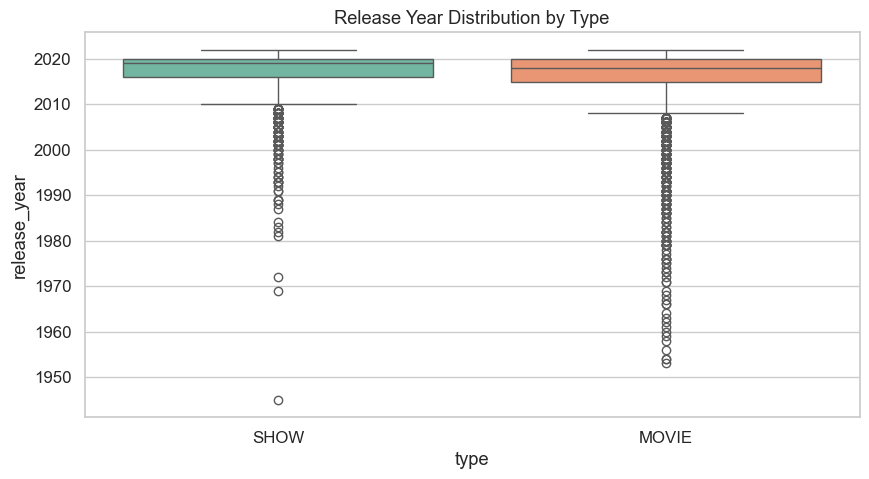

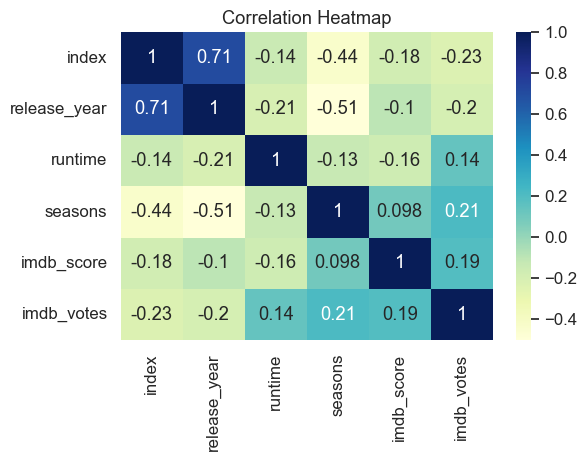

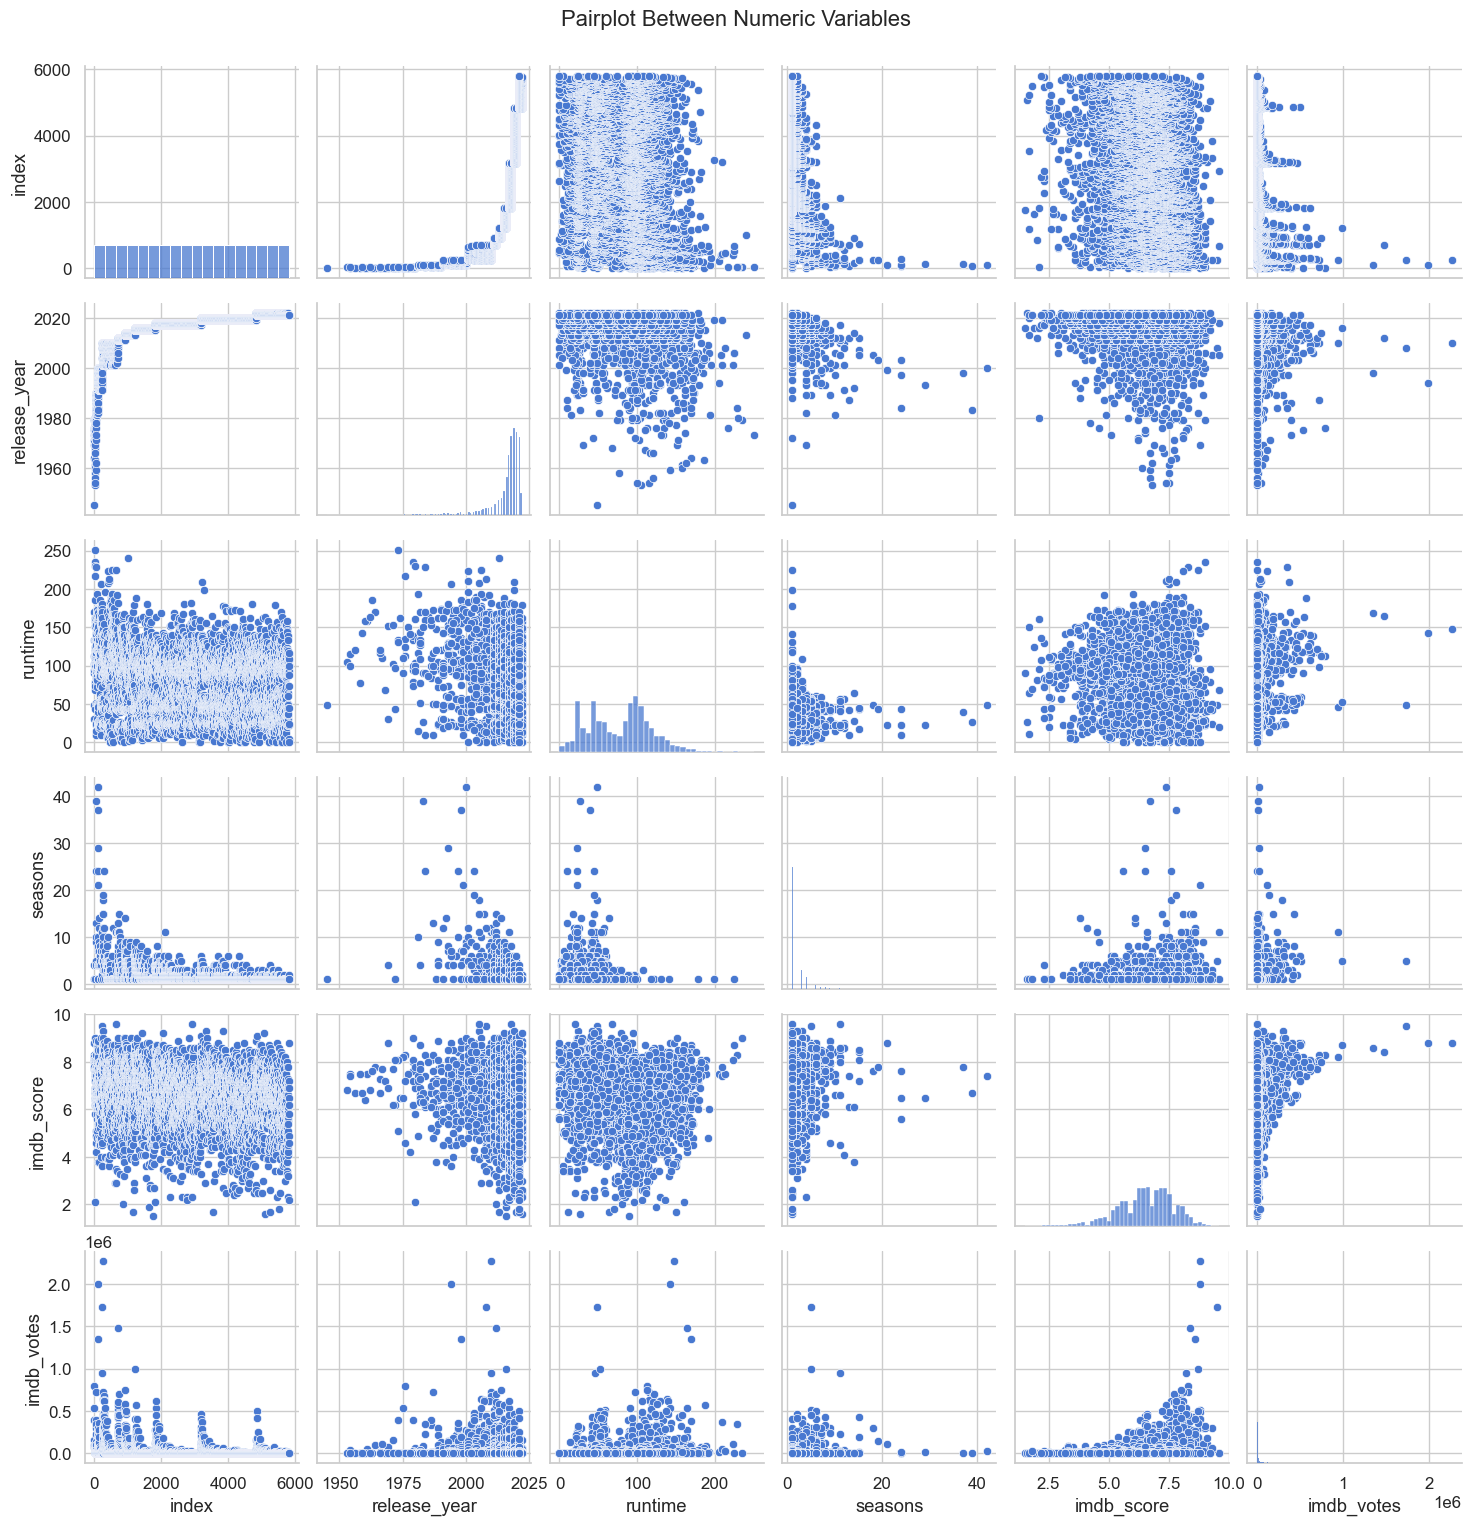

In [14]:
# Scatterplot between release_year and type grouping
plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='release_year', data=netflix, palette='Set2')
plt.title('Release Year Distribution by Type')
plt.show()

# Correlation heatmap
corr = netflix.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot if multiple numerical columns exist
num_cols = netflix.select_dtypes(include=['int64','float64']).columns
if len(num_cols) > 1:
    sns.pairplot(netflix[num_cols])
    plt.suptitle('Pairplot Between Numeric Variables', y=1.02)
    plt.show()

## 🧠 Step 6: Interpretations & Insights
- Majority of Netflix titles are movies released after 2010.
- Distribution of release years is slightly right-skewed (more recent titles).
- Few outliers exist in early release years, likely older classic titles.
- Type variable shows movies dominate over TV shows.
- Weak correlation among numeric variables suggests independent relationships.
- Categorical counts show 'United States' and 'India' among top-producing countries.

## 🏁 Step 7: Final Conclusion
✅ The EDA successfully identifies data quality issues, distribution trends, and relationships.

### Key Highlights:
1. Most Netflix content is recent (post-2010).
2. Minimal outliers; data is relatively clean.
3. Movies dominate the dataset.
4. USA and India contribute most to Netflix catalog.
5. Weak correlations suggest distinct independent content features.

**All Assignment 3 requirements (Measures of Central Tendency, Variability, and Bivariate Analysis) have been met and extended with richer visualizations.**